**<p style = "text-align: center">TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐẠI HỌC QUỐC GIA TPHCM</p>**

# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> KHÁM PHÁ, THỐNG KÊ CỦA TOP CÁC CA KHÚC TRÊN SPOTIFY</p>
<p style = "text-align: center"> Sinh viên thực hiện </p>

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120127 | Trần Minh Tuấn Kiệt |
| 20120136 | Huỳnh Tuấn Nam |
| 20120158 | Trần Hoàng Anh Phi |

---

# **Import các thư viện**

In [424]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# **1. Thông tin về dữ liệu**<br>
Dữ liệu được sử dụng trong bài được lấy từ trang: <a href = "https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv"> https://www.kaggle.com/datasets/yelexa/spotify200?select=final.csv</a><br>
Dataset chứa các ca khúc nằm trong TOP 200 ca khúc hay nhất trong 1 tuần của mỗi quốc gia từ 2021/02/04 ~ 2022/07/14

Theo như file "README.md":
> This directory contains codes that I used to create the dataset: https://www.kaggle.com/datasets/yelexa/spotify200<br><br>To create the dataset, I downloaded the csv files from the 'Weekly Top Songs' charts on Spotify Charts for each country from the week of 2021/02/04 ~ 2022/07/14. For the 'Global' charts, there is data from the week of 2016/12/29 ~ 2022/07/14. I used concat.py to create one combined file for each country, then used data.py to collect additional data for each song from the Spotify API.<br><br>The dataset was aggregated into an interactive dashboard, where you can explore artists and music trends around the world: https://public.tableau.com/app/profile/yejielee/viz/TheModernARExperienceWhichGlobalArtistWillYouSign/ar_dashboard?publish=yes

## **2. Khám phá dữ liệu**

Đọc dữ liệu từ file csv

In [425]:
spotify_df = pd.read_csv("csv/final.csv", index_col= 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\2503757291.py:1: DtypeWarning: Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_df = pd.read_csv("csv/final.csv", index_col= 0)


## Một số thông tin cơ bản của Data Frame

Xem vài dòng dữ liệu

In [426]:
spotify_df.head()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,source,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a976c5597baf6f7b786c,0,Plan A,2022-03-23,1.0,https://i.scdn.co/image/ab67616d0000b2737e1179e64539bedc938933ef,WEA Latina,1,1,4,3003411,2022-04-14,0.583,0.834,0.0,1.0,-4.875,0.0444,0.0495,0.0,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish,0
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e1511f68e988110962dd9c,0,ARRANCARMELO,2022-04-06,1.0,https://i.scdn.co/image/ab67616d0000b273d8c9945c63f1806031dae6f0,DOGUITO Records / DALE PLAY Records,2,129,2,2512175,2022-04-14,0.654,0.354,5.0,1.0,-7.358,0.0738,0.724,0.0,0.134,0.262,81.956,183547.0,Argentina,South America,Spanish,0
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a976c5597baf6f7b786c,0,Chance,2022-04-06,2.0,https://i.scdn.co/image/ab67616d0000b273274a28ec692ca28a73da1288,WEA Latina,3,59,2,2408983,2022-04-14,0.721,0.463,1.0,0.0,-9.483,0.0646,0.241,0.0,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish,0
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,https://i.scdn.co/image/ab6761610000e5eb8f4ebcf4a5d23a2515374f89,0,Una Noche en Medellín,2022-01-21,1.0,https://i.scdn.co/image/ab67616d0000b273697ed12671078b5dee48f0ad,Nabru Records LLC,5,5,8,2080139,2022-04-14,0.87,0.548,10.0,0.0,-5.253,0.077,0.0924,0.000046,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish,0
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1453d77d1d758c224bd,0,cuatro veinte,2022-03-24,1.0,https://i.scdn.co/image/ab67616d0000b273116b57ed14bc15d57eb838fa,Sony Music Latin,6,9,3,1923270,2022-04-14,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.101,0.501,95.066,133895.0,Argentina,South America,Spanish,0


Số chiều của Data Frame

In [427]:
spotify_df.shape

(1787999, 35)

Tên của các cột

In [428]:
spotify_df.columns

Index(['uri', 'rank', 'artist_names', 'artists_num', 'artist_individual',
       'artist_id', 'artist_genre', 'artist_img', 'collab', 'track_name',
       'release_date', 'album_num_tracks', 'album_cover', 'source',
       'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams', 'week',
       'danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'country', 'region', 'language', 'pivot'],
      dtype='object')

## Thông tin của một dòng

Mỗi một dòng dữ liệu là thông tin của một bài hát thịnh hành trong TOP 200 của một tuần bất kì.

## Thông tin của một cột

In [429]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
columns_describe_df = pd.read_csv("csv/columns.csv")
columns_describe_df

,Tên cột,Mô tả
0,uri,URI của bản nhạc trên spotify
1,rank,Xếp hạng của bản nhạc trong tuần
2,artist names,Tên tất cả người thực hiện ca khúc
3,artists num,Số người thực hiện bài hát
4,artist individual,Bài hát của cá nhân nghệ sĩ
5,artist id,URI của nghệ sĩ độc quyền bài hát
6,artist genre,Thể loại mà nghệ sĩ trình diễn
7,artist img,Đường dẫn hình ảnh của nghệ sĩ
8,collab,0 nếu nghệ sĩ trình diễn một mình và 1 nếu ngược lại
9,track name,tên của bản nhạc


Để thuận tiện cho việc xử lí dữ liệu, nên chọn ra những cột thể hiện được đặc trưng của dữ liệu, một phần giúp giảm lượng dữ liệu cần giải quyết

Các cột cần thiết như: <br>
**Về bản nhạc**: uri, rank, artists_name, artists_num, artist_individual, collab, track_name, release_date, source, peak_rank, previous_rank, weeks_on_rank, streams, country, region, language<br>
**Về nghệ sĩ độc quyền của bản nhạc**: artist_id, artist_genre<br>

In [430]:
# cols = ["uri", "rank", 'artist_names', 'artists_num', 'artist_individual', 'collab', 'track_name', 'release_date', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams', 'country', 'region', 'language', 'artist_id', 'artist_genre']
# spotify_df = spotify_df[cols]
spotify_df = spotify_df[spotify_df.columns[~spotify_df.columns.isin(['artist img','album cover', 'album num tracks', 'source', 'pivot'])]]

## Kiểm tra xem các trường dữ liệu có vấn đề gì không

**Dữ liệu có bị trùng hay không?**

In [431]:
spotify_df.duplicated().sum()

72

Có 73 giá trị trùng 

In [432]:
spotify_df[spotify_df.duplicated()]

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
51224,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
75474,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
81333,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
104818,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
133873,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684645,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
1705705,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
1736824,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
1758970,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language


Như vậy có 73 giá trị trùng nhau (72 + 1 giá trị gốc), và bằng với số lượng dòng có giá trị giống tên cột. 

Ta sẽ loại bỏ các dòng này và loại bỏ luôn dòng gốc 

In [433]:
spotify_df.drop_duplicates(keep=False, inplace=True)
spotify_df.duplicated().sum()

0

Theo như tác giả, nếu một bài hát có nhiều ca sĩ thể hiện, bài hát sẽ được chia thành các hàng riêng cho từng nghệ sĩ. Tuy nhiên, ở đây ta bỏ qua thông tin của từng người thể hiện và chỉ xét đến thông tin của bài hát, do đó ta sẽ bỏ đi các cột trùng nhau này (chỉ khác nhau ở thông tin các nghệ sĩ thành viên). 

Thông tin của mỗi bài hát được phân biệt với nhau bằng <font color=red>uri, country, week</font>, vì vậy ta sẽ drop các hàng trùng nhau dựa trên cột này.

In [434]:
spotify_df = spotify_df.drop_duplicates(subset=['uri','country','week'] , keep='first', ignore_index=True)

**Dữ liệu bị thiếu, rỗng**

In [435]:
# spotify_df[spotify_df.isna().any(axis=1)]
# spotify_df[spotify_df.isnull().any(axis=1)]

spotify_df.isna().sum()

uri                    0
rank                   0
artist_names           0
artists_num            0
artist_individual      0
artist_id              0
artist_genre           0
artist_img           816
collab                 0
track_name             0
release_date           0
album_num_tracks       0
album_cover           15
peak_rank              0
previous_rank          0
weeks_on_chart         0
streams                0
week                   0
danceability         145
energy               145
key                  145
mode                 145
loudness             145
speechiness          145
acousticness         145
instrumentalness     145
liveness             145
valence              145
tempo                145
duration             145
country                0
region                 0
language               0
dtype: int64

Có một vài giá trị thiếu, ta sẽ xử lý các giá trị này sau

**Xem một vài thông tin của dataframe:**

In [436]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109520 entries, 0 to 1109519
Data columns (total 33 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   uri                1109520 non-null  object
 1   rank               1109520 non-null  object
 2   artist_names       1109520 non-null  object
 3   artists_num        1109520 non-null  object
 4   artist_individual  1109520 non-null  object
 5   artist_id          1109520 non-null  object
 6   artist_genre       1109520 non-null  object
 7   artist_img         1108704 non-null  object
 8   collab             1109520 non-null  object
 9   track_name         1109520 non-null  object
 10  release_date       1109520 non-null  object
 11  album_num_tracks   1109520 non-null  object
 12  album_cover        1109505 non-null  object
 13  peak_rank          1109520 non-null  object
 14  previous_rank      1109520 non-null  object
 15  weeks_on_chart     1109520 non-null  object
 16  

**Xảy ra một số vấn đề về kiểu dữ liệu. Là do có nhiều kiểu dữ liệu bên trong cột.**

In [437]:
def open_oject_dtype(column):
    dtypes = set(column.apply(lambda x: type(x)))
    
    return dtypes

In [438]:
# spotify_df["rank"].unique()

# spotify_df["artists_num"].unique()

# spotify_df["collab"].unique()

# spotify_df["peak_rank"].unique()

# spotify_df["previous_rank"].unique()

# spotify_df["weeks_on_chart"].unique()

# spotify_df["streams"].unique()

# spotify_df[spotify_df["uri"] == "uri"]

In [439]:
columns = spotify_df.columns
# open_oject_dtype(spotify_df["uri"])
spotify_df[columns].apply(open_oject_dtype)

uri                                                  {<class 'str'>}
rank                                  {<class 'int'>, <class 'str'>}
artist_names                                         {<class 'str'>}
artists_num                         {<class 'float'>, <class 'str'>}
artist_individual                                    {<class 'str'>}
artist_id                                            {<class 'str'>}
artist_genre                                         {<class 'str'>}
artist_img                          {<class 'float'>, <class 'str'>}
collab                                {<class 'int'>, <class 'str'>}
track_name                                           {<class 'str'>}
release_date                                         {<class 'str'>}
album_num_tracks                    {<class 'float'>, <class 'str'>}
album_cover                         {<class 'float'>, <class 'str'>}
peak_rank                             {<class 'int'>, <class 'str'>}
previous_rank                     

Cột `rank`, `artists_num`, `collab`, `peak_rank`, `previous_rank`, `weeks_on_chart`, `streams`: một phần số với kiểu dữ liệu **int**, một phần số với kiểu dữ liệu là **str**<br>

**Ta thấy các cột `rank`, `artist_num`, `collab`, `peak_rank`, `previous_rank`, `weeks_on_chart`, `streams` lẽ ra phải có kiểu dữ liệu là numeric.** 
- Do đó ta sẽ tiến hành chuyển các cột này về đúng kiểu dữ liệu.<br>
- Ta sẽ viết hàm để thuận tiện cho việc chuyển.<br>
- Riêng cột `artists_num` có thêm hậu tố .0 phía sau nên sẽ xử lý riêng.

In [440]:
def to_numeric(column, data_type):
    spotify_df[column] = spotify_df[column].astype(data_type)
    #return spotify_df[column]
# print(spotify_df)

In [441]:
to_numeric('rank', int)

In [442]:
to_numeric('peak_rank', int)

In [443]:
to_numeric('previous_rank', int)

In [444]:
spotify_df['artists_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1109520 entries, 0 to 1109519
Series name: artists_num
Non-Null Count    Dtype 
--------------    ----- 
1109520 non-null  object
dtypes: object(1)
memory usage: 8.5+ MB


Cột `artists_num` có mixtypes

In [445]:
count = spotify_df['artists_num'].value_counts()
count[count.index=='1.0'].sum()

515719

Text(0.5, 1.0, 'Số lượng ca sĩ thể hiện bài hát')

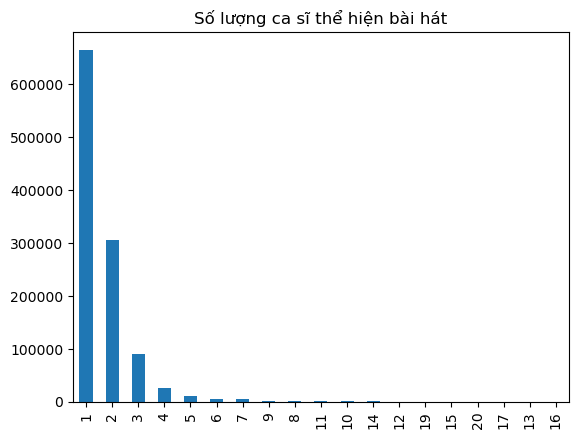

In [446]:
spotify_df['artists_num'] = spotify_df['artists_num'].apply(lambda x: str(x).replace('.0', '')).astype('Int64')
spotify_df['artists_num'].value_counts().plot.bar()
plt.title('Số lượng ca sĩ thể hiện bài hát')

In [457]:
to_numeric('collab', int)
spotify_df['collab'].value_counts()

**Số lượng giá trị 0 ở cột collab và giá trị 1 ở cột artists_num phải bằng nhau (số lượng nghệ sĩ biểu diễn là 1 người thì có nghĩa là không collab với ai)**

In [448]:
test = spotify_df[spotify_df['artists_num'] == 1].index == spotify_df[spotify_df['collab'] == 0].index
test.sum()

665596

Vậy ta có thể loại cột `collab` để giảm chiều dữ liệu? (vì từ cột `artists_num` có thể suy ra được cột `collab`)  

In [449]:
spotify_df.drop('collab', axis=1, inplace=True)

Ngoài ra, ta cũng cần chuyển kiểu dữ liệu của `release_date`, `week` về thành datetime

In [450]:
pattern = '%Y-%m-%d'
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], format=pattern)
spotify_df['week'] = pd.to_datetime(spotify_df['week'], format=pattern)

**Chuyển các cột `đặc trưng` (biên độ, âm lượng, tiết tấu..) của âm thanh thành kiểu dữ liệu numeric**

In [451]:
audio_cols = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

spotify_df[audio_cols].head()

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.583,0.834,0.0,1.0,-4.875,0.0444,0.0495,0.0,0.0658,0.557,173.935,178203.0
1,0.654,0.354,5.0,1.0,-7.358,0.0738,0.724,0.0,0.134,0.262,81.956,183547.0
2,0.721,0.463,1.0,0.0,-9.483,0.0646,0.241,0.0,0.0929,0.216,137.915,204003.0
3,0.87,0.548,10.0,0.0,-5.253,0.077,0.0924,0.000046,0.0534,0.832,96.018,153750.0
4,0.761,0.696,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.101,0.501,95.066,133895.0


In [452]:
spotify_df[audio_cols] = spotify_df[audio_cols].astype(float)

**Xem qua một vài thống kê của dữ liệu**

In [453]:
spotify_df.describe()

,rank,artists_num,peak_rank,previous_rank,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,1.109520e+06,1109520.0,1.109520e+06,1.109520e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06,1.109375e+06
mean,1.005018e+02,1.611443,4.191652e+01,8.435407e+01,6.817758e-01,6.418535e-01,5.325786e+00,5.742693e-01,-6.350350e+00,1.059117e-01,2.697053e-01,1.148840e-02,1.682632e-01,5.346420e-01,1.219060e+02,2.050580e+05
std,5.773315e+01,1.010256,4.659037e+01,5.949596e+01,1.381223e-01,1.638659e-01,3.629385e+00,4.944535e-01,2.461208e+00,9.691305e-02,2.528607e-01,7.584283e-02,1.249962e-01,2.263884e-01,2.981120e+01,5.015941e+04
min,1.000000e+00,1.0,1.000000e+00,-1.000000e+00,8.590000e-02,3.160000e-03,0.000000e+00,0.000000e+00,-4.141000e+01,2.230000e-02,1.770000e-06,0.000000e+00,1.340000e-02,1.000000e-05,3.126200e+01,3.013300e+04
25%,5.100000e+01,1.0,6.000000e+00,3.100000e+01,5.910000e-01,5.350000e-01,2.000000e+00,0.000000e+00,-7.671000e+00,4.100000e-02,5.470000e-02,0.000000e+00,9.270000e-02,3.640000e-01,9.698300e+01,1.726270e+05
50%,1.010000e+02,1.0,2.200000e+01,8.200000e+01,7.010000e-01,6.600000e-01,6.000000e+00,1.000000e+00,-6.008000e+00,6.290000e-02,1.860000e-01,0.000000e+00,1.180000e-01,5.370000e-01,1.199840e+02,1.997100e+05
75%,1.502500e+02,2.0,6.500000e+01,1.350000e+02,7.870000e-01,7.660000e-01,8.000000e+00,1.000000e+00,-4.598000e+00,1.330000e-01,4.180000e-01,5.220000e-05,2.030000e-01,7.100000e-01,1.410200e+02,2.295650e+05
max,2.000000e+02,20.0,2.000000e+02,2.000000e+02,9.860000e-01,1.000000e+00,1.100000e+01,1.000000e+00,1.906000e+00,9.660000e-01,9.950000e-01,9.900000e-01,9.900000e-01,9.920000e-01,2.320180e+02,1.787030e+06


***

In [461]:
# from fuzzywuzzy import fuzz as wz
# vals = spotify_df['artist_genre'].value_counts().index
# common = [i for i in vals if ' ' not in i]
# spotify_df['artist_genre'].value_counts()[:20]#[common[:20]]
# def transform_genre(x):
#     vals = spotify_df['artist_genre'].value_counts().index
#     common = [i for i in vals if ' ' not in i]
#     for i in common:
#         if wz.partial_ratio(x, i)==100:
#             return i
#     return x
# spotify_df['artist_genre_trans'] = spotify_df['artist_genre'].apply(transform_genre)
# spotify_df['artist_genre_trans'] 
# wz.partial_ratio('hip hop', 'argentine hip hop')s
# common

In [455]:
sum(spotify_df['artist_genre'].value_counts().values==1)

79

**Ta thấy có rất nhiều thể loại nhạc (1326 thể loại)**
- Tại sao lại có thể loại nhạc là 0, nghĩa là không có thể loại nhạc (không có thông tin) hay lý do gì khác? Các giá trị này đến từ đâu?

In [462]:
spotify_df[spotify_df['artist_genre']=='0']

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
18,spotify:track:1fKFxmSByZfjwVSbq0PHye,40,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,1.0,https://i.scdn.co/image/ab67616d0000b27361d8f01f54a346681218e81f,29,37,31,803350,2022-04-14,0.419,0.711,11.0,0.0,-4.083,0.0488,0.0513,0.000000,0.2430,0.529,82.180,428439.0,Argentina,South America,Spanish
52,spotify:track:6bLvfGI2XeU5DTl8feuNrk,135,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Cómo estás,2019-04-17,1.0,https://i.scdn.co/image/ab67616d0000b2736dda5e26404d61699789809f,25,139,141,285952,2022-04-14,0.590,0.857,10.0,0.0,-1.986,0.0553,0.2890,0.000004,0.0414,0.976,135.290,227396.0,Argentina,South America,Spanish
108,spotify:track:1fKFxmSByZfjwVSbq0PHye,45,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,1.0,https://i.scdn.co/image/ab67616d0000b27361d8f01f54a346681218e81f,29,41,33,704832,2022-04-28,0.419,0.711,11.0,0.0,-4.083,0.0488,0.0513,0.000000,0.2430,0.529,82.180,428439.0,Argentina,South America,Spanish
154,spotify:track:6bLvfGI2XeU5DTl8feuNrk,161,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Cómo estás,2019-04-17,1.0,https://i.scdn.co/image/ab67616d0000b2736dda5e26404d61699789809f,25,138,143,254727,2022-04-28,0.590,0.857,10.0,0.0,-1.986,0.0553,0.2890,0.000004,0.0414,0.976,135.290,227396.0,Argentina,South America,Spanish
207,spotify:track:6bLvfGI2XeU5DTl8feuNrk,94,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Cómo estás,2019-04-17,1.0,https://i.scdn.co/image/ab67616d0000b2736dda5e26404d61699789809f,25,92,90,291731,2021-04-08,0.590,0.857,10.0,0.0,-1.986,0.0553,0.2890,0.000004,0.0414,0.976,135.290,227396.0,Argentina,South America,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109476,spotify:track:3NPWH2UbMjch2vnS7qMFGM,100,"11:11 Music Group, Martin Arteta",2,11:11 Music Group,spotify:artist:2MDj296KJIfgWDNBtHzeFi,0,https://i.scdn.co/image/ab6761610000e5eb1e4934c0258b5137aadab413,Past Lives,2021-05-27,8.0,https://i.scdn.co/image/ab67616d0000b2735b4d1c2a12718efb519ec78a,73,98,23,61505,2022-05-05,0.730,0.125,3.0,1.0,-17.216,0.0340,0.9160,0.072500,0.0783,0.189,116.058,134583.0,Vietnam,Asia,Vietnamese
1109495,spotify:track:5xOkL4eAs735nm6mcnvfS6,139,"Flo D, Giang Nguyễn",2,Flo D,spotify:artist:25cLQ8alZJssXY06KE3SZP,0,https://i.scdn.co/image/ab6761610000e5ebc43411f88f4c61ef613d0c0f,#AiChoAi,2016-04-24,1.0,https://i.scdn.co/image/ab67616d0000b2737f5cf89a00065bcafa3076a0,62,174,25,49274,2022-05-05,0.730,0.316,6.0,1.0,-10.632,0.0428,0.9170,0.000343,0.1110,0.713,117.952,159974.0,Vietnam,Asia,Vietnamese
1109501,spotify:track:3wrzXRNJVxwOByPpYjyujB,151,"Studio Party, Quang Trung, Vũ Thảo My",3,Studio Party,spotify:artist:4JTjvap7y8AE0AMCH2f6kt,0,https://i.scdn.co/image/ab67616d0000b273bf30aa67f1e46b58809c7b90,Và Ngày Nào Đó (feat. Vũ Thảo My),2022-03-16,4.0,https://i.scdn.co/image/ab67616d0000b273bf30aa67f1e46b58809c7b90,109,140,7,46618,2022-05-05,0.472,0.292,11.0,0.0,-10.275,0.0415,0.7750,0.000000,0.3250,0.140,133.591,269733.0,Vietnam,Asia,Vietnamese
1109503,spotify:track:2MHGIiWus5xHykiZGuDtNe,158,"Sean, Lửa",2,Sean,spotify:artist:1xNqmjTeWon7iX8kbPKpZz,0,https://i.scdn.co/image/ab

In [463]:
spotify_df[spotify_df['artist_genre']=='0']['country'].value_counts()

Saudi Arabia    1496
Thailand        1175
Netherlands      851
Germany          766
Italy            751
                ... 
Nicaragua        117
Honduras         110
Hong Kong        101
Pakistan          94
Venezuela         29
Name: country, Length: 74, dtype: int64

In [464]:
spotify_df[audio_cols].isna().sum()

danceability        145
energy              145
key                 145
mode                145
loudness            145
speechiness         145
acousticness        145
instrumentalness    145
liveness            145
valence             145
tempo               145
duration            145
dtype: int64

***

# **Đưa ra các câu hỏi cần trả lời:**
1. Dựa vào các đặc trưng về âm thanh của một bài hát, hãy thử dự đoán thể loại nhạc của bài hát đó.
2. 


### **Trả lời câu hỏi 1**:
- Đầu tiên, ta vẽ biểu đồ heatmap để xác định hệ số tương quan giữa các biến.
- Vì có quá nhiều thể loại nhạc, gây khó khăn cho việc phân lớp, nên ta chỉ trích xuất ra những thể loại có tần xuất xuất hiện lớn và thực hiện mô hình.
- Chuẩn hoá các giá trị cho phù hợp với đầu vào của mô hình.
- Thử nghiệm các mô hình.
- Đánh giá kết quả.

**Lấy ra những thằng artist_genre có số lượng lớn hơn 10000**

In [470]:
df = spotify_df[spotify_df.groupby('artist_genre')['artist_genre'].transform('count')>7000].copy()
# spotify_df.groupby('artist_genre').filter(lambda x: x['artist_genre'].count() > 10000)['artist_genre'].value_counts()
df['artist_genre'].value_counts()

pop                     125702
trap latino              42656
latin                    38454
reggaeton                36275
dance pop                34766
0                        28796
uk pop                   19249
rap                      18180
k-pop                    16274
canadian pop             14710
reggaeton colombiano     10558
latin pop                 9878
hip hop                   9511
australian hip hop        8790
pop dance                 8365
modern rock               8173
pop rap                   7898
german hip hop            7731
edm                       7309
russian hip hop           7060
tropical house            7029
Name: artist_genre, dtype: int64

<font color=red>*Kể từ đây, ta chỉ dùng sub-dataframe: df để tiếp tục tính cho câu 1*</font>

In [471]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # điền các giá trị thiếu
import numpy as np

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

le = LabelEncoder()
le.fit(df['artist_genre'])
df['categorical_label'] = le.transform(df['artist_genre']) # transform label to numbers

In [472]:
df['categorical_label'].value_counts()

11    125702
18     42656
8      38454
15     36275
3      34766
0      28796
20     19249
14     18180
7      16274
2      14710
16     10558
9       9878
6       9511
1       8790
12      8365
10      8173
13      7898
5       7731
4       7309
17      7060
19      7029
Name: categorical_label, dtype: int64

In [473]:
le.inverse_transform(df['categorical_label']) # transform label back to original

array(['pop', 'latin', 'latin', ..., '0', 'dance pop', 'pop'],
      dtype=object)

**Trực quan hoá dữ liệu**

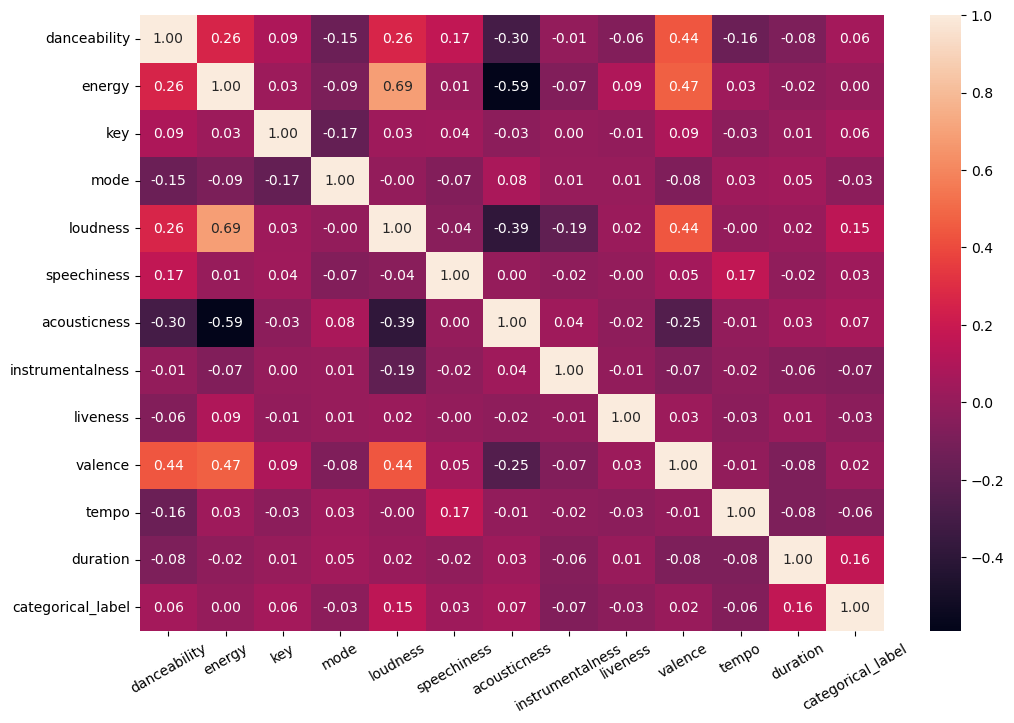

In [474]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df[audio_cols+['categorical_label']].corr(), annot=True, fmt='.2f')
plt.xticks(rotation=30)
plt.show()

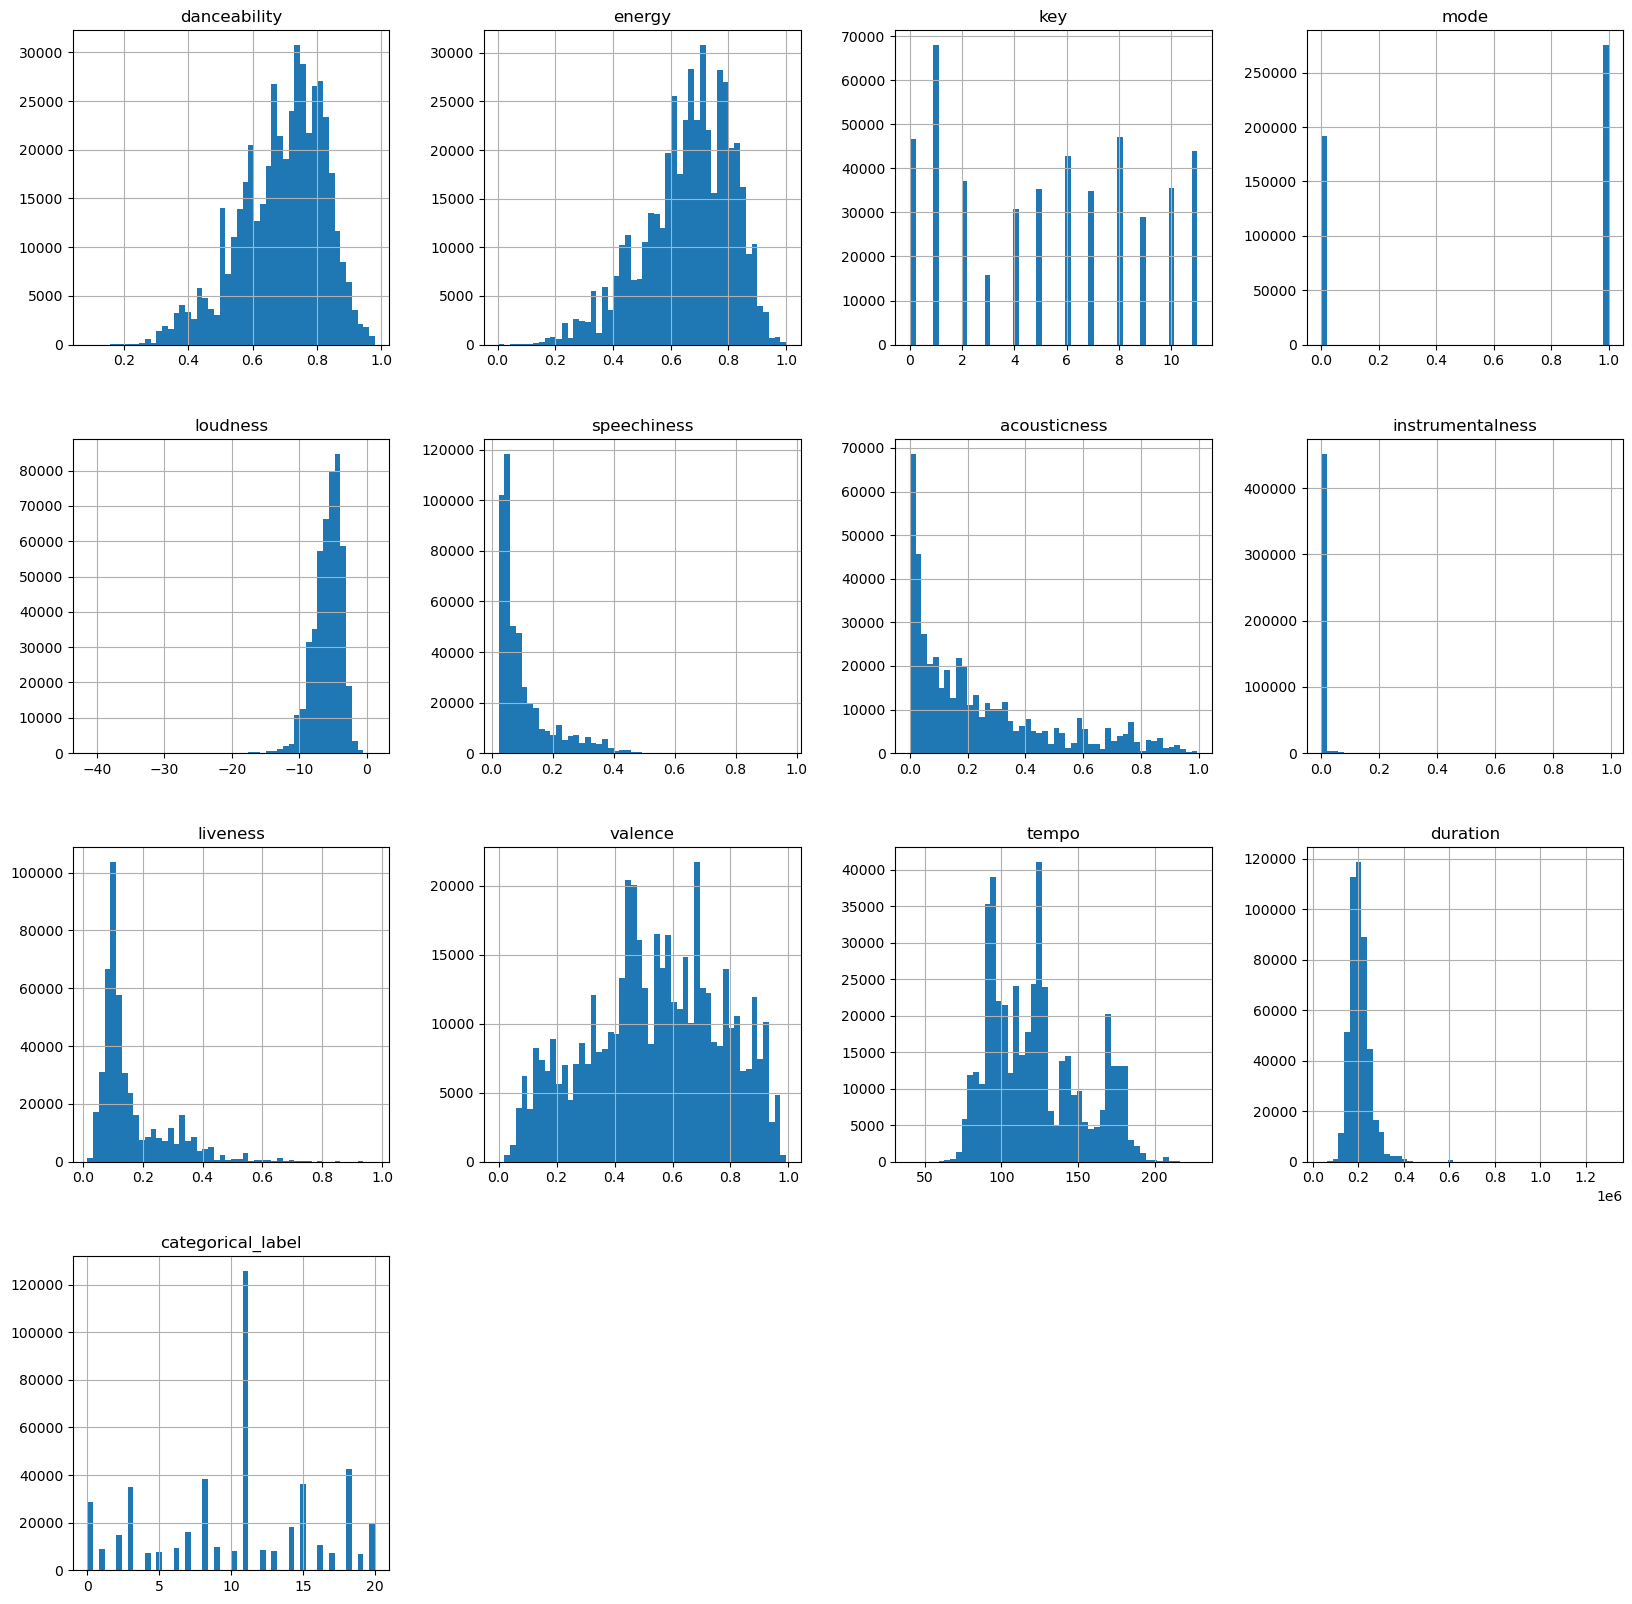

In [475]:
df[audio_cols+['categorical_label']].hist(bins=50, figsize=(20,20))
# ax.set_title("Hisogram plot", size=15, weight='bold')
plt.show()

In [476]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'median') # điền các gía trị thiếu bằng median
df[audio_cols] = imp.fit_transform(df[audio_cols])
df[audio_cols].isna().sum()

danceability        0
energy              0
key                 0
mode                0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
dtype: int64

In [477]:
new_df = df[audio_cols+['categorical_label']]
for i in new_df.columns:
  print(f'Skewness in {i} =',new_df[i].skew())

Skewness in danceability = -0.6068046312233515
Skewness in energy = -0.6735616959489054
Skewness in key = 0.03482130700412153
Skewness in mode = -0.36119121843682805
Skewness in loudness = -1.0587567219094003
Skewness in speechiness = 1.9011115067967348
Skewness in acousticness = 1.174511799842808
Skewness in instrumentalness = 12.047501548635804
Skewness in liveness = 1.9537594849349722
Skewness in valence = -0.16398718274476107
Skewness in tempo = 0.5358313078545861
Skewness in duration = 1.798825173136104
Skewness in categorical_label = -0.18740941806756847


Các cột có high skew: 
- loudness
- speechiness
- acousticness
- instrucmentalness
- liveness
- duration

In [478]:
df['loudness_trans'] = np.cbrt(df['loudness'])
df['speechiness_trans'] = np.reciprocal(df['speechiness'])
df['acousticness_trans'] = np.cbrt(df['acousticness'])
df['instrumentalness_trans'] = np.log(df['instrumentalness'].apply(lambda x: x + 0.000001))
df['liveness_trans'] = np.cbrt(df['liveness'])
df['duration_trans'] = np.sqrt(df['duration'])
df['tempo_trans'] = np.cbrt(df['tempo'])

In [479]:
df.shape

(467364, 40)

In [480]:
df.head()

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,categorical_label,loudness_trans,speechiness_trans,acousticness_trans,instrumentalness_trans,liveness_trans,duration_trans,tempo_trans
5,spotify:track:4LRPiXqCikLlN15c3yImP7,11,Harry Styles,1,Harry Styles,spotify:artist:6KImCVD70vtIoJWnq6nGn3,pop,https://i.scdn.co/image/ab6761610000e5ebf7db7c8ede90a019c54590bb,As It Was,2022-03-31,1.0,https://i.scdn.co/image/ab67616d0000b273b46f74097655d7f353caab14,6,6,2,1555631,2022-04-14,0.520,0.731,6.0,0.0,-5.338,0.0557,0.3420,0.00101,0.311,0.662,173.930,167303.0,Argentina,South America,Spanish,11,-1.747670,17.953321,0.699319,-6.896815,0.677517,409.026894,5.582021
11,spotify:track:1UdzJEpgJxtuXAlCOvD4S0,26,Danny Ocean,1,Danny Ocean,spotify:artist:5H1nN1SzW0qNeUEZvuXjAj,latin,https://i.scdn.co/image/ab6761610000e5eb5f8bb457ee2815cc276ddb9d,Fuera del mercado,2022-02-17,16.0,https://i.scdn.co/image/ab67616d0000b273be462dd5903fb27996331b48,26,49,3,1029069,2022-04-14,0.453,0.673,8.0,1.0,-5.649,0.1440,0.3200,0.00000,0.131,0.266,92.060,159849.0,Argentina,South America,Spanish,8,-1.780972,6.944444,0.683990,-13.815511,0.507875,399.811205,4.515339
17,spotify:track:6ylDpki1VpIsc525KC1ojF,39,Sebastian Yatra,1,Sebastian Yatra,spotify:artist:07YUOmWljBTXwIseAUd9TW,latin,https://i.scdn.co/image/ab6761610000e5eb28cc5ee1d7ba49cdc7dde27b,Tacones Rojos,2022-01-28,17.0,https://i.scdn.co/image/ab67616d0000b2739f6800546cfaaacb3fa4b145,21,38,25,805602,2022-04-14,0.746,0.844,11.0,0.0,-3.499,0.0359,0.0620,0.00000,0.149,0.934,123.014,189333.0,Argentina,South America,Spanish,8,-1.518150,27.855153,0.395789,-13.815511,0.530146,435.124120,4.973379
18,spotify:track:1fKFxmSByZfjwVSbq0PHye,40,Ke Personajes,1,Ke Personajes,spotify:artist:06Q5VlSAku57lFzyME3HrM,0,https://i.scdn.co/image/ab6761610000e5eb062db075b1b0ef066cf3f39c,Si No Te Tengo / Ángel / Aquello Que Pasó,2021-08-17,1.0,https://i.scdn.co/image/ab67616d0000b27361d8f01f54a346681218e81f,29,37,31,803350,2022-04-14,0.419,0.711,11.0,0.0,-4.083,0.0488,0.0513,0.00000,0.243,0.529,82.180,428439.0,Argentina,South America,Spanish,0,-1.598305,20.491803,0.371569,-13.815511,0.624025,654.552519,4.347658
21,spotify:track:2JPLbjOn0wPCngEot2STUS,58,Bad Bunny,1,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,latin,https://i.scdn.co/image/ab6761610000e5eb8ee9a6f54dcbd4bc95126b14,Yonaguni,2021-06-04,1.0,https://i.scdn.co/image/ab67616d0000b27364afd6879102d03460bd3ad9,3,57,45,519093,2022-04-14,0.644,0.648,1.0,1.0,-4.601,0.1180,0.2760,0.00000,0.135,0.440,179.951,206710.0,Argentina,South America,Spanish,8,-1.663224,8.474576,0.651083,-13.815511,0.512993,454.653714,5.645704


In [332]:
df.drop(columns = ['duration','loudness','speechiness','acousticness','instrumentalness','liveness','tempo'], inplace = True)

## **Build model**

In [481]:
columns = ["artist_names","track_name"]
le = LabelEncoder()
for col in columns:
  df[col] = le.fit_transform(df[col])

In [482]:
X = df[['danceability', 'energy', 'key',
       'mode', 'valence', 
       'duration','loudness','speechiness','acousticness','instrumentalness','liveness','tempo']]
Y = df['categorical_label']

**Split train test**

In [483]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=11)

**Standard Scaler**

In [484]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=21, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

[00:32:33] WARNING: D:\bld\xgboost-split_1667849704519\work\src\learner.cc:767: 
Parameters: { "num_classes" } are not used.

XG Boost accuracy is: 59.29%


In [485]:
Xgbclassifier.save_model('xgb_model.json')

In [486]:
Xgbclassifier.best_ntree_limit

1000

**Normalizer**

In [487]:
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

normalizer = Normalizer()
normalized_x_train = pd.DataFrame(normalizer.fit_transform(x_train), columns = x_train.columns)

Xgbclassifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=14, random_state=5).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = Xgbclassifier.predict(normalized_x_test)

XGBAcc = accuracy_score(y_pred,y_test)
print('XG Boost accuracy is: {:.2f}%'.format(XGBAcc*100))

[00:44:09] WARNING: D:\bld\xgboost-split_1667849704519\work\src\learner.cc:767: 
Parameters: { "num_classes" } are not used.

XG Boost accuracy is: 5.20%


**Logistic Regression and MinMaxScaler**

In [488]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

LR = LogisticRegression(solver='newton-cg', multi_class = 'multinomial',random_state = 7).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = LR.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 33.18%


In [489]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver='liblinear').fit(normalized_x_train, y_train)
normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = LR.predict(normalized_x_test)

LRAcc = accuracy_score(y_pred,y_test) # Calculate accuracy
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 31.56%


**Random Forest**

In [490]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

RFclassifier = RandomForestClassifier(max_leaf_nodes = 30,random_state = 3).fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
y_pred = RFclassifier.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest accuracy is: 37.70%


***

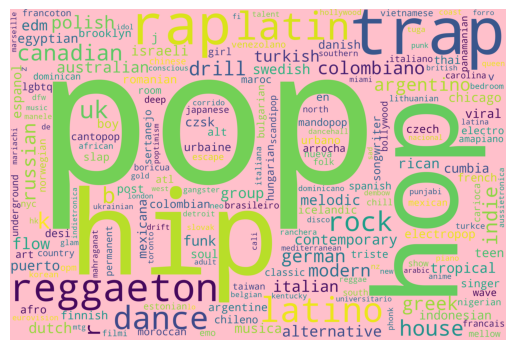

In [59]:
text = ', '.join(spotify_df['artist_genre'])
word_cloud = WordCloud(width=3000, 
                       height=2000, 
                       random_state=1, 
                       background_color='pink', 
                     #   colormap='Pastel1',
                       collocations=False,
                       stopwords=', ').generate(text)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
!git ls-tree -r --name-only --full-name modeling

.gitignore
Final Project.ipynb
README.md
csv_file.txt


In [99]:
from collections import Counter
def reduce_categories(col, threshold=0.85):
    threshold_value = int(threshold*len(col))
    reduced_cats = []
    s = 0
    counts = Counter(col)
    
    for i, j in counts.most_common():
        s+=dict(counts)[i]
        reduced_cats.append(i)
        if s>=threshold_value:
            break
    reduced_cats.append('Other')
    
    new_col=col.apply(lambda x: x if x in reduced_cats else 'Other')
    return new_col, reduced_cats

col, cate = reduce_categories(spotify_df['artist_genre'])
col.value_counts()

Other               267694
pop                 156910
0                   114300
trap latino          86148
reggaeton            73510
                     ...  
video game music      1356
chalga                1356
folk-pop              1336
gauze pop             1335
pop reggaeton         1318
Name: artist_genre, Length: 224, dtype: int64

### **Trả lời câu hỏi 2**: Thời gian nào trong năm thì bài hát dễ 'lên hạng'?

In [491]:
spotify_df.sample(5)

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language
946414,spotify:track:3IrNhMvzard7nCKgfe18IW,119,Benjamin Ingrosso,1,Benjamin Ingrosso,spotify:artist:7jEEE187pVG6InOxn03oA5,swedish pop,https://i.scdn.co/image/ab6761610000e5eb261ac3f20b895ee6f6aa2aa8,Allt det vackra,2021-04-16,8.0,https://i.scdn.co/image/ab67616d0000b2736b902bceec6cde3110f44c50,6,126,38,145881,2022-01-20,0.537,0.376,5.0,1.0,-8.659,0.0272,0.370,0.000000,0.0907,0.3260,76.019,204964.0,Sweden,Europe,Swedish
438121,spotify:track:27RSJHEA99Y0Vsow7nA37A,11,"Sech, Jhay Cortez",2,Sech,spotify:artist:77ziqFxp5gaInVrF2lj4ht,reggaeton,https://i.scdn.co/image/ab6761610000e5eb2f364933daca7516c6193ffe,911 - Remix,2021-07-09,1.0,https://i.scdn.co/image/ab67616d0000b273b6afd6496eaf917ceaa5730a,8,11,11,54642,2021-09-23,0.816,0.710,7.0,1.0,-3.728,0.0398,0.165,0.000000,0.2920,0.7840,93.020,208631.0,Honduras,Central America,Spanish
502901,spotify:track:7F8RNvTQlvbeBLeenycvN6,72,"A.R. Rahman, Javed Ali, Mohit Chauhan",3,A.R. Rahman,spotify:artist:1mYsTxnqsietFxj1OgoGbG,desi pop,https://i.scdn.co/image/ab6761610000e5ebb19af0ea736c6228d6eb539c,Kun Faya Kun,2011-10-01,15.0,https://i.scdn.co/image/ab67616d0000b27354e544672baa16145d67612b,60,65,68,426915,2021-07-29,0.362,0.378,1.0,1.0,-11.008,0.0329,0.679,0.000000,0.0910,0.5750,87.549,470500.0,India,Asia,Hindi
1091519,spotify:track:5CZ40GBx1sQ9agT82CLQCT,193,Olivia Rodrigo,1,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,https://i.scdn.co/image/ab6761610000e5ebee954a3b5418065c2fe253fb,traitor,2021-05-21,11.0,https://i.scdn.co/image/ab67616d0000b273a91c10fe9472d9bd89802e5a,124,196,16,12897,2022-07-14,0.380,0.339,3.0,1.0,-7.885,0.0338,0.691,0.000000,0.1200,0.0849,100.607,229227.0,Venezuela,South America,Spanish
318153,spotify:track:11HLDMuPD3wh88XHw4udKO,58,"Laylow, Nekfeu, Fousheé",3,Laylow,spotify:artist:0LnhY2fzptb0QEs5Q5gM7S,french hip hop,https://i.scdn.co/image/ab6761610000e5eb78d1ed629fc28d0d89dab346,SPECIAL (feat. Nekfeu & Fousheé),2021-07-16,20.0,https://i.scdn.co/image/ab67616d0000b2739bbbf5ca66b29b25236379cb,8,59,37,542296,2022-03-31,0.674,0.520,10.0,0.0,-9.464,0.1460,0.187,0.000002,0.2590,0.4070,70.572,231587.0,France,Europe,French


In [492]:
standard_prev_rank = spotify_df['previous_rank'].apply(lambda x: 200 if x == -1 else x)
spotify_df['rank_up'] = standard_prev_rank - spotify_df['rank']

In [493]:
spotify_df[spotify_df['country']=='Vietnam'][spotify_df['rank']==1]#.value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\3235955672.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spotify_df[spotify_df['country']=='Vietnam'][spotify_df['rank']==1]#.value_counts()


,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,rank_up
1094320,spotify:track:186NCtNk1tUYS7c2DxgJ7O,1,V,1,V,spotify:artist:3JsHnjpbhX4SnySpvpa9DK,korean ost,https://i.scdn.co/image/ab6761610000e5ebfe5cecc2ed191d2db9acdc90,Christmas Tree,2021-12-24,2.0,https://i.scdn.co/image/ab67616d0000b2738764ebc69bd91a01cc3948a2,1,-1,1,562360,2021-12-30,0.437,0.384,5.0,1.0,-8.384,0.0420,0.69900,0.000023,0.1210,0.181,139.009,209947.0,Vietnam,Asia,Vietnamese,199
1094429,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,1,Adele,1,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,pop,https://i.scdn.co/image/ab6761610000e5eb68f6e5892075d7f22615bd17,Easy On Me,2021-10-14,1.0,https://i.scdn.co/image/ab67616d0000b27350dba34377a595e35f81b0e4,1,-1,1,473784,2021-10-21,0.604,0.366,5.0,1.0,-7.519,0.0282,0.57800,0.000000,0.1330,0.130,141.981,224695.0,Vietnam,Asia,Vietnamese,199
1094551,spotify:track:7uQZVznj0uQOGC9KhV2Mg6,1,LISA,1,LISA,spotify:artist:5L1lO4eRHmJ7a0Q6csE5cT,k-pop,https://i.scdn.co/image/ab6761610000e5eb7315c4978296c4de311f577e,LALISA,2021-09-10,2.0,https://i.scdn.co/image/ab67616d0000b273330f11fb125bb80b760f9e19,1,-1,1,506931,2021-09-16,0.806,0.653,8.0,1.0,-6.283,0.0902,0.02820,0.000784,0.1070,0.850,150.058,200690.0,Vietnam,Asia,Vietnamese,199
1094925,spotify:track:7CAdT0HdiQNlt1C7xk2hep,1,Jung Kook,1,Jung Kook,spotify:artist:6HaGTQPmzraVmaVxvz6EUc,0,https://i.scdn.co/image/ab6761610000e5eb219729769002abab3f23ef21,Stay Alive (Prod. SUGA of BTS),2022-02-11,1.0,https://i.scdn.co/image/ab67616d0000b2738916a2bb404bed6755f2bbbd,1,-1,1,1586444,2022-02-17,0.512,0.760,2.0,0.0,-5.889,0.0682,0.29900,0.000000,0.1030,0.495,130.096,210928.0,Vietnam,Asia,Vietnamese,199
1095158,spotify:track:5fFLotKS1286huYIMQHqz7,1,Sơn Tùng M-TP,1,Sơn Tùng M-TP,spotify:artist:5dfZ5uSmzR7VQK0udbAVpf,vietnamese melodic rap,https://i.scdn.co/image/ab6761610000e5eb1036554ddc5f791a4f5dcfc3,Muộn Rồi Mà Sao Còn,2021-04-29,1.0,https://i.scdn.co/image/ab67616d0000b27329f906fe7a60df7777b02ee1,1,91,2,1208277,2021-05-06,0.888,0.418,0.0,1.0,-9.812,0.0573,0.66500,0.000000,0.1110,0.531,127.073,275906.0,Vietnam,Asia,Vietnamese,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108639,spotify:track:3FeVmId7tL5YN8B7R3imoM,1,"Coldplay, BTS",2,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,pop,https://i.scdn.co/image/ab6761610000e5eb865a3301762a8fce048cb469,My Universe,2021-09-24,2.0,https://i.scdn.co/image/ab67616d0000b273f60a9b7e2abafc38da31f575,1,1,2,301719,2021-10-07,0.588,0.701,9.0,1.0,-6.390,0.0402,0.00813,0.000000,0.2000,0.443,104.988,228000.0,Vietnam,Asia,Vietnamese,0
1108806,spotify:track:7DF8lvLdV3htIbuTWpc7lR,1,"Juice WRLD, SUGA, BTS",3,Juice WRLD,spotify:artist:4MCBfE4596Uoi2O4DtmEMz,chicago rap,https://i.scdn.co/image/ab6761610000e5eb1908e1a8b79abf71d5598944,Girl Of My Dreams (with SUGA of BTS),2021-12-10,18.0,https://i.scdn.co/image/ab67616d0000b273c820e86be3bcbc65e5b88ef0,1,-1,1,498962,2021-12-16,0.603,0.771,9.0,1.0,-6.336,0.0627,0.19400,0.000000,0.1300,0.332,139.988,226149.0,Vietnam,Asia,Vietnamese,199
1109050,spotify:track:3FeVmId7tL5YN8B7R3imoM,1,"Coldplay, BTS",2,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,pop,https://i.scdn.co/image/ab6761610000e5eb865a3301762a8fce048cb469,My Universe,2021-09-24,2.0,https://i.scdn.co/image/ab67616d0000b273f60a9b7e2abafc38da31f575,1,-1,1,560437,2021-09-30,0.588,0.701,9.0,1.0,-6.390,0.0402,0.00813,0.000000,0.2000,0.443,104.988,228000.0,Vietnam,Asia,Vietnamese,199
1109125,spotify:track:0mBP9X2gPCuapvpZ7TGDk3,1,"Charlie Puth, BTS, Jung Kook",3,Charlie Puth,spotify:artist:6VuMaDnrHyPL1p4EHjYLi7,dance pop,https://i.scdn.co/image/ab6761610000e5eb0d890ffd0e0bea5f904f1a9f,Left and Right (Feat. Jun

In [494]:
trending = spotify_df[spotify_df['country']=='Vietnam'][spotify_df['rank_up']==spotify_df['rank_up'].max()]
trending

C:\Users\Admin\AppData\Local\Temp\ipykernel_10108\4125805770.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trending = spotify_df[spotify_df['country']=='Vietnam'][spotify_df['rank_up']==spotify_df['rank_up'].max()]


,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,rank_up
1094320,spotify:track:186NCtNk1tUYS7c2DxgJ7O,1,V,1,V,spotify:artist:3JsHnjpbhX4SnySpvpa9DK,korean ost,https://i.scdn.co/image/ab6761610000e5ebfe5cecc2ed191d2db9acdc90,Christmas Tree,2021-12-24,2.0,https://i.scdn.co/image/ab67616d0000b2738764ebc69bd91a01cc3948a2,1,-1,1,562360,2021-12-30,0.437,0.384,5.0,1.0,-8.384,0.0420,0.69900,0.000023,0.1210,0.181,139.009,209947.0,Vietnam,Asia,Vietnamese,199
1094429,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,1,Adele,1,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,pop,https://i.scdn.co/image/ab6761610000e5eb68f6e5892075d7f22615bd17,Easy On Me,2021-10-14,1.0,https://i.scdn.co/image/ab67616d0000b27350dba34377a595e35f81b0e4,1,-1,1,473784,2021-10-21,0.604,0.366,5.0,1.0,-7.519,0.0282,0.57800,0.000000,0.1330,0.130,141.981,224695.0,Vietnam,Asia,Vietnamese,199
1094551,spotify:track:7uQZVznj0uQOGC9KhV2Mg6,1,LISA,1,LISA,spotify:artist:5L1lO4eRHmJ7a0Q6csE5cT,k-pop,https://i.scdn.co/image/ab6761610000e5eb7315c4978296c4de311f577e,LALISA,2021-09-10,2.0,https://i.scdn.co/image/ab67616d0000b273330f11fb125bb80b760f9e19,1,-1,1,506931,2021-09-16,0.806,0.653,8.0,1.0,-6.283,0.0902,0.02820,0.000784,0.1070,0.850,150.058,200690.0,Vietnam,Asia,Vietnamese,199
1094925,spotify:track:7CAdT0HdiQNlt1C7xk2hep,1,Jung Kook,1,Jung Kook,spotify:artist:6HaGTQPmzraVmaVxvz6EUc,0,https://i.scdn.co/image/ab6761610000e5eb219729769002abab3f23ef21,Stay Alive (Prod. SUGA of BTS),2022-02-11,1.0,https://i.scdn.co/image/ab67616d0000b2738916a2bb404bed6755f2bbbd,1,-1,1,1586444,2022-02-17,0.512,0.760,2.0,0.0,-5.889,0.0682,0.29900,0.000000,0.1030,0.495,130.096,210928.0,Vietnam,Asia,Vietnamese,199
1095648,spotify:track:2jk6oBuLiCZJTDWhlJEzIw,1,j-hope,1,j-hope,spotify:artist:0b1sIQumIAsNbqAoIClSpy,k-rap,https://i.scdn.co/image/ab6761610000e5ebfa980b99bc5f4d47b4253f82,Airplane,2018-03-02,7.0,https://i.scdn.co/image/ab67616d0000b273a2de0bc4a200af9490caa662,1,-1,1,454813,2022-02-10,0.801,0.651,0.0,1.0,-7.855,0.0579,0.65000,0.000000,0.1090,0.238,119.992,197914.0,Vietnam,Asia,Vietnamese,199
1096139,spotify:track:0LThjFY2iTtNdd4wviwVV2,1,BTS,1,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,k-pop,https://i.scdn.co/image/ab6761610000e5eb5704a64f34fe29ff73ab56bb,Permission to Dance,2021-07-09,4.0,https://i.scdn.co/image/ab67616d0000b2739c194644c08101a2b44d1b31,1,-1,1,505613,2021-07-15,0.702,0.741,9.0,1.0,-5.330,0.0427,0.00544,0.000000,0.3370,0.646,124.925,187585.0,Vietnam,Asia,Vietnamese,199
1098505,spotify:track:10SRMwb9EuVS1K9rYsBfHQ,1,BTS,1,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,k-pop boy group,https://i.scdn.co/image/ab6761610000e5eb5704a64f34fe29ff73ab56bb,Yet To Come,2022-06-10,35.0,https://i.scdn.co/image/ab67616d0000b27317db30ce3f081d6818a8ad49,1,-1,1,1755027,2022-06-16,0.559,0.885,1.0,1.0,-4.515,0.1890,0.04320,0.000000,0.3330,0.683,172.029,193594.0,Vietnam,Asia,Vietnamese,199
1098964,spotify:track:1Y7AZ3akqDipAyo6mmOQTy,1,Agust D,1,Agust D,spotify:artist:5RmQ8k4l3HZ8JoPb4mNsML,k-rap,https://i.scdn.co/image/ab6761610000e5ebe94c521bbe0604a5fcd4f8bf,Daechwita,2020-05-22,10.0,https://i.scdn.co/image/ab67616d0000b2736c0e2c778e672701e1a254c6,1,-1,11,396761,2022-03-03,0.650,0.827,8.0,1.0,-4.014,0.0599,0.02290,0.000000,0.1210,0.223,144.995,225668.0,Vietnam,Asia,Vietnamese,199
1100324,spotify:track:2pn8dNVSpYnAtlKFC8Q0DJ,1,ROSÉ,1,ROSÉ,spotify:artist:3eVa5w3URK5duf6eyVDbu9,k-pop,https://i.scdn.co/image/ab6761610000e5eba23b22965ecef5703f58b6c5,On The Ground,2021-03-12,2.0,https://i.scdn.co/image/ab67616d0000b273fdec91537c467efa0cd75e2f,1,-1,1,595967,2021-03-18,0.311,0.607,1.0,1.0,-6.578,0.1100,0.01740,0.000000,0.1310,0.286,188.700,168086.0,Vietnam,Asia,Vietnamese,199
1100569,spotify:track:6GJi4nSZOiTOU2FhsgxWyH,1,Vũ.,1,Vũ.,spotify:artist

In [495]:
x = spotify_df[spotify_df['country']=='Vietnam'].groupby(spotify_df['week'].dt.month)['rank_up'].value_counts()
x

week  rank_up
1     -1         40
       0         39
      -2         38
      -6         34
       2         33
                 ..
12     173        1
       179        1
       180        1
       187        1
       197        1
Name: rank_up, Length: 1862, dtype: int64

In [496]:
pd.DataFrame(x.to_frame().rename(columns={'rank_up': 'counts'}).reset_index().sort_values(by=['rank_up']))

,week,rank_up,counts
566,4,-166,1
1791,12,-151,1
402,3,-140,1
1792,12,-136,1
955,6,-133,1
...,...,...,...
826,5,199,1
1790,12,199,2
954,6,199,2
1707,11,199,1


Check một bài hát đã ở trong top tuần này có ở trong top tuần khác không?

In [497]:
spotify_df[spotify_df['country'] == 'Global']

,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,track_name,release_date,album_num_tracks,album_cover,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,rank_up
338782,spotify:track:6MWtB6iiXyIwun0YzU6DFP,2,Post Malone,1,Post Malone,spotify:artist:246dkjvS1zLTtiykXe5h60,rap,https://i.scdn.co/image/ab6761610000e5ebb894ef9fa437b0389c5567cc,Wow.,2018-12-24,1.0,https://i.scdn.co/image/ab67616d0000b27379eb2363cc79781b03d80b2e,2,3,4,29944242,2019-01-17,0.833,0.539,11.0,0.0,-7.399,0.1780,0.1630,0.000002,0.1010,0.385,99.947,149520.0,Global,Global,Global,1
338783,spotify:track:2rPE9A1vEgShuZxxzR2tZH,3,Ariana Grande,1,Ariana Grande,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,pop,https://i.scdn.co/image/ab6761610000e5ebcdce7620dc940db079bf4952,"thank u, next",2018-11-03,1.0,https://i.scdn.co/image/ab67616d0000b273ffa275ba245edba4c1c720af,1,2,11,27807232,2019-01-17,0.724,0.647,1.0,1.0,-5.642,0.0658,0.2800,0.000000,0.1020,0.435,106.960,207333.0,Global,Global,Global,-1
338784,spotify:track:5p7ujcrUXASCNwRaWNHR1C,4,Halsey,1,Halsey,spotify:artist:26VFTg2z8YR0cCuwLzESi2,electropop,https://i.scdn.co/image/ab6761610000e5ebd707e1c5177614c4ec95a06c,Without Me,2018-10-04,1.0,https://i.scdn.co/image/ab67616d0000b273c42acc1b86597285c2c79559,4,4,15,27138512,2019-01-17,0.752,0.488,6.0,1.0,-7.050,0.0705,0.2970,0.000009,0.0936,0.533,136.041,201661.0,Global,Global,Global,0
338785,spotify:track:25sgk305KZfyuqVBQIahim,6,Ava Max,1,Ava Max,spotify:artist:4npEfmQ6YuiwW1GpUmaq3F,pop,https://i.scdn.co/image/ab6761610000e5eb27a772a3d3f62f6fc990ce0f,Sweet but Psycho,2018-08-17,1.0,https://i.scdn.co/image/ab67616d0000b273c5015d2a9270865a5979f56b,6,6,16,22400542,2019-01-17,0.719,0.704,1.0,1.0,-4.724,0.0476,0.0691,0.000000,0.1660,0.628,133.002,187436.0,Global,Global,Global,0
338786,spotify:track:1rqqCSm0Qe4I9rUvWncaom,9,Panic! At The Disco,1,Panic! At The Disco,spotify:artist:20JZFwl6HVl6yg8a4H3ZqK,modern rock,https://i.scdn.co/image/ab6761610000e5ebb256ae9a4b82bfff97776ae2,High Hopes,2018-06-22,11.0,https://i.scdn.co/image/ab67616d0000b273c5148520a59be191eea16989,9,11,30,19643546,2019-01-17,0.579,0.904,5.0,1.0,-2.729,0.0618,0.1930,0.000000,0.0640,0.681,82.014,190947.0,Global,Global,Global,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,spotify:track:6WkJ2OK163XXS2oARUC9JM,188,"Aaron Smith, Krono, Luvli",3,Aaron Smith,spotify:artist:77qukKzmdI5BeMBR7WGUrN,chicago house,https://i.scdn.co/image/ab6761610000e5eb4e3b9e4559d3cff50dcc69cf,Dancin (feat. Luvli) - Krono Remix,2014-11-07,1.0,https://i.scdn.co/image/ab67616d0000b273f7a3a5656060030a0d24855c,101,167,15,4606395,2019-06-13,0.720,0.741,10.0,0.0,-6.529,0.0287,0.1010,0.000014,0.2890,0.357,119.896,198053.0,Global,Global,Global,-21
396771,spotify:track:2kkcJ8tSDV42LdWcPjy6We,194,"Samra, Capital Bra",2,Samra,spotify:artist:6h1s4i4XKIYv4ErDelLDN0,german hip hop,https://i.scdn.co/image/ab6761610000e5eb434a7526f8a622e4b3c3bb79,Wieder Lila,2019-05-17,1.0,https://i.scdn.co/image/ab67616d0000b273beb0cccc098b713f30c4ed43,47,132,4,4547192,2019-06-13,0.656,0.756,2.0,0.0,-4.026,0.3000,0.4350,0.000000,0.0934,0.645,168.031,188057.0,Global,Global,Global,-62
396772,spotify:track:2tOOcDDYkh0PSjr6GwPEAJ,196,"MAX, Quinn XCII",2,MAX,spotify:artist:1bqxdqvUtPWZri43cKHac8,electropop,https://i.scdn.co/image/ab6761610000e5eb09ce0644c08fa03347ef8928,Love Me Less (feat. Quinn XCII),2019-04-05,1.0,https://i.scdn.co/image/ab67616d0000b273038e01a9fbf375dcccea5a3c,135,168,4,4538692,2019-06-13,0.732,0.856,11.0,0.0,-2.200,0.0929,0.0828,0.000000,0.3230,0.771,145.034,177670.0,Global,Global,Global,-28
396773,spotify:track:6RUKPb4LETWmmr3iAEQktW,197,"The Chainsmokers, Coldplay",2,The Chainsmokers,spotify:artist:69GGBxA162lTqCwzJG5jLp,tropical house,https://i.scdn.co/image/ab6761610000e5eb3c02f

In [498]:
spotify_df.groupby('week')['track_name'].value_counts()

week        track_name                              
2016-12-29  All I Want for Christmas Is You             2
            24K Magic                                   1
            7 Years                                     1
            A Holly Jolly Christmas - Single Version    1
            Ain't My Fault                              1
                                                       ..
2022-07-14  高嶺の花子さん                                     1
            鯨落                                          1
            黑暗的盡頭                                       1
            니가 왜 거기서 나와 (Narr. 고은아)                     1
            스물다섯, 스물하나                                  1
Name: track_name, Length: 452810, dtype: int64